In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

2024-09-20 21:22:26.461668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [2]:
#Load data
df=pd.read_csv("abalone.data",header=None)
#Rname Column Names
df.columns=["Sex","Length","Diameter","Height","Whole weight",
            "Shucked weight","Viscera weight","Shell weight","Rings"]

In [3]:
#Clean up data - convert 'M', 'F', and 'I' to 0, 1, and 2
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I':2})

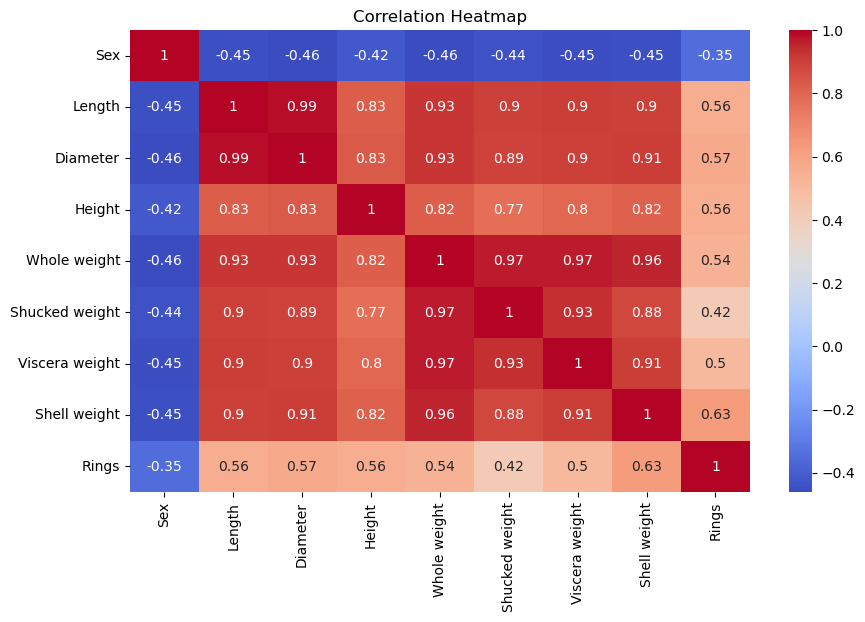

In [4]:
#Draw correlation heat map
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

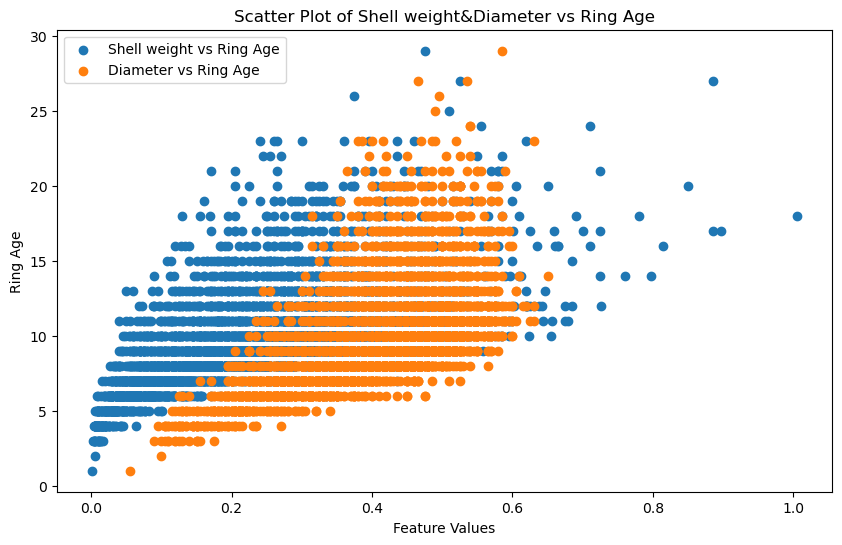

In [5]:
#Select the two most relevant features, 'Shell weight' and 'Diameter'
#Create Scatter Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Shell weight'], df['Rings'], label='Shell weight vs Ring Age')
plt.scatter(df['Diameter'], df['Rings'], label='Diameter vs Ring Age')
plt.xlabel('Feature Values')
plt.ylabel('Ring Age')
plt.legend()
plt.title('Scatter Plot of Shell weight&Diameter vs Ring Age')
plt.show()

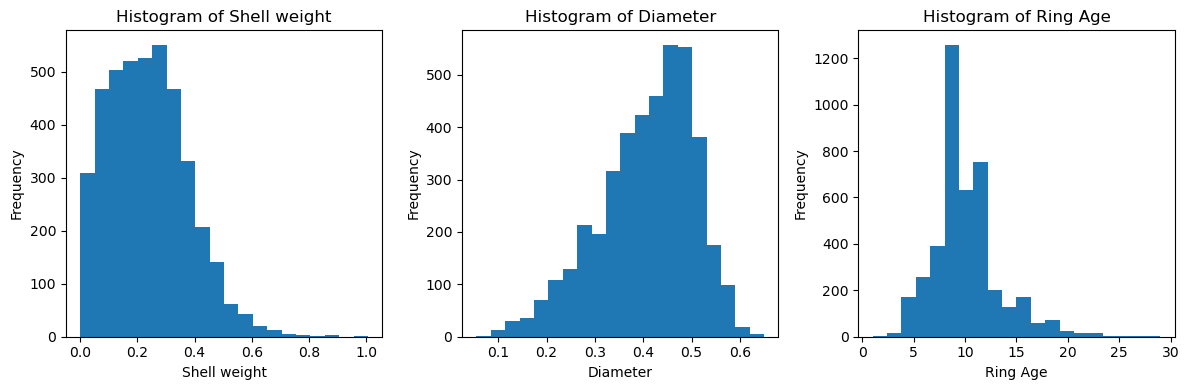

In [6]:
#Create histograms of 'Shell weight' and 'Diameter' features and 'ring age'
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Shell weight'], bins=20)
plt.xlabel('Shell weight')
plt.ylabel('Frequency')
plt.title('Histogram of Shell weight')

plt.subplot(1, 3, 2)
plt.hist(df['Diameter'], bins=20)
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Histogram of Diameter')

plt.subplot(1, 3, 3)
plt.hist(df['Rings'], bins=20)
plt.xlabel('Ring Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ring Age')

plt.tight_layout()
plt.show()

In [7]:
#Divide training and testing sets
X = df.drop('Rings', axis=1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Average RMSE (Train): 2.18 ± 0.03
Average RMSE (Test): 2.23 ± 0.05
Average R-squared (Train): 0.54 ± 0.01
Average R-squared (Test): 0.52 ± 0.02


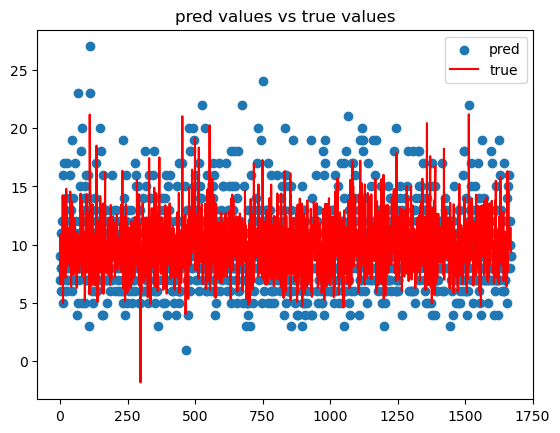

In [8]:
#Create a linear regression model and train it
def LR(X, y):
    linear = LinearRegression()
    rmse_train_scores = []
    rmse_test_scores = []
    r2_train_scores = []
    r2_test_scores = []
    for _ in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=_)
        linear.fit(X_train, y_train)
        y_train_pred = linear.predict(X_train)
        y_test_pred = linear.predict(X_test)
        #Evaluation
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        r2_train = r2_score(y_train, y_train_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train_scores.append(rmse_train)
        rmse_test_scores.append(rmse_test)
        r2_train_scores.append(r2_train)
        r2_test_scores.append(r2_test)
    #Calculate the mean and standard deviation
    avg_rmse_train = np.mean(rmse_train_scores)
    avg_rmse_test = np.mean(rmse_test_scores)
    std_rmse_train = np.std(rmse_train_scores)
    std_rmse_test = np.std(rmse_test_scores)

    avg_r2_train = np.mean(r2_train_scores)
    avg_r2_test = np.mean(r2_test_scores)
    std_r2_train = np.std(r2_train_scores)
    std_r2_test = np.std(r2_test_scores)
    print("Average RMSE (Train): {:.2f} ± {:.2f}".format(avg_rmse_train, std_rmse_train))
    print("Average RMSE (Test): {:.2f} ± {:.2f}".format(avg_rmse_test, std_rmse_test))
    print("Average R-squared (Train): {:.2f} ± {:.2f}".format(avg_r2_train, std_r2_train))
    print("Average R-squared (Test): {:.2f} ± {:.2f}".format(avg_r2_test, std_r2_test))
    return y_test,y_test_pred
y_test,y_test_pred=LR(X, y)
plt.scatter(range(len(y_test)),y_test,label="pred")
plt.plot(range(len(y_test_pred)),y_test_pred,color="red",label="true")
plt.title("pred values vs true values")
plt.legend()
plt.show()

In [9]:
#Normalized features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


print("\nLinear Regression Model Comparison:")
print("Without Normalization:")
LR(X, y)
print("With Normalization:")
LR(X_normalized, y)


Linear Regression Model Comparison:
Without Normalization:
Average RMSE (Train): 2.18 ± 0.03
Average RMSE (Test): 2.23 ± 0.05
Average R-squared (Train): 0.54 ± 0.01
Average R-squared (Test): 0.52 ± 0.02
With Normalization:
Average RMSE (Train): 2.18 ± 0.03
Average RMSE (Test): 2.23 ± 0.05
Average R-squared (Train): 0.54 ± 0.01
Average R-squared (Test): 0.52 ± 0.02


(2681     9
 2046     7
 3474     6
 3563     8
 1439     8
         ..
 852     10
 3894    12
 1511    10
 1002     9
 282      9
 Name: Rings, Length: 1671, dtype: int64,
 array([10.8404807 ,  7.25106337,  6.61412948, ..., 11.47295016,
         9.77842399,  9.3922685 ]))

In [10]:
#Linear regression modeling using two selected features
selected_features = ['Shell weight', 'Diameter']
X_selected = df[selected_features]
LR(X_selected, y)

Average RMSE (Train): 2.50 ± 0.04
Average RMSE (Test): 2.52 ± 0.06
Average R-squared (Train): 0.40 ± 0.01
Average R-squared (Test): 0.39 ± 0.02


(2681     9
 2046     7
 3474     6
 3563     8
 1439     8
         ..
 852     10
 3894    12
 1511    10
 1002     9
 282      9
 Name: Rings, Length: 1671, dtype: int64,
 array([11.01160385,  7.68879554,  7.39509779, ..., 12.320967  ,
        10.16233991,  8.69584732]))

In [11]:
#Constructing Neural Network Model Functions
def create_model(hidden_units=64, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model
model = KerasRegressor(build_fn=create_model, verbose=0)
# 定义超参数网格
param_grid = {
    'hidden_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}
rmse_train_scores = []
rmse_test_scores = []
r2_train_scores = []
r2_test_scores = []
#Using GridSearchCV for hyperparameter search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=None, scoring='neg_mean_squared_error')
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=0)
grid_search_result = grid_search.fit(X_train_normalized, y_train)
print(f"Best Parameters: {grid_search_result.best_params_}")
best_model = grid_search_result.best_estimator_
for _ in range(30):
    X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=_)
    #Evaluate the model on the optimal parameters
    best_model.fit(X_train_normalized, y_train)
    train_rmse = np.sqrt(abs(best_model.score(X_train_normalized, y_train)))
    test_rmse = np.sqrt(abs(best_model.score(X_test_normalized, y_test)))
    train_r2 =r2_score(y_train,best_model.predict(X_train_normalized))
    test_r2 = r2_score(y_test,best_model.predict(X_test_normalized))
    rmse_train_scores.append(train_rmse)
    rmse_test_scores.append(test_rmse)
    r2_train_scores.append(train_r2)
    r2_test_scores.append(test_r2)
avg_rmse_train = np.mean(rmse_train_scores)
avg_rmse_test = np.mean(rmse_test_scores)
std_rmse_train = np.std(rmse_train_scores)
std_rmse_test = np.std(rmse_test_scores)
avg_r2_train = np.mean(r2_train_scores)
avg_r2_test = np.mean(r2_test_scores)
std_r2_train = np.std(r2_train_scores)
std_r2_test = np.std(r2_test_scores)
print("Average RMSE (Train) for Best Model: {:.2f} ± {:.2f}".format(avg_rmse_train, std_rmse_train))
print("Average RMSE (Test) for Best Model: {:.2f} ± {:.2f}".format(avg_rmse_test, std_rmse_test))
print("Average R-squared (Train) for Best Model: {:.2f} ± {:.2f}".format(avg_r2_train, std_r2_train))
print("Average R-squared (Test) for Best Model: {:.2f} ± {:.2f}".format(avg_r2_test, std_r2_test))

/tmp/ipykernel_3535/1242639606.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
2023-10-13 03:14:33.224774: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Best Parameters: {'hidden_units': 64, 'learning_rate': 0.01}
Average RMSE (Train) for Best Model: 2.70 ± 0.10
Average RMSE (Test) for Best Model: 2.72 ± 0.10
Average R-squared (Train) for Best Model: 0.30 ± 0.05
Average R-squared (Test) for Best Model: 0.29 ± 0.05
